# 이상치 처리하기

### exchange

#### USD

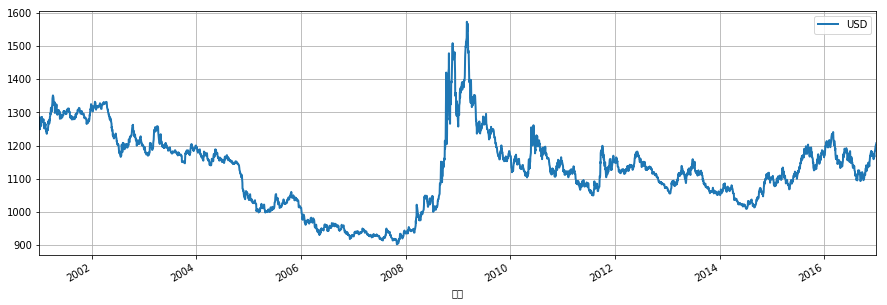

In [249]:
exchange[['날짜','USD']].plot(x='날짜')

> 이상치로 보이는 값 없음

#### EUR

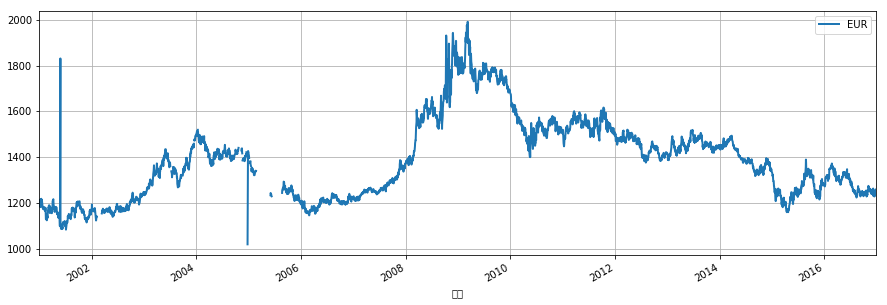

In [250]:
exchange[['날짜','EUR']].plot(x='날짜')

> 결측치가 다수 존재하는 것으로 보이며 이상치가 존재하는 것으로 보임

In [256]:
# (1) 2001년 ~ 2002년 사이 이상치
exchange[exchange['EUR']>1800].head(5) # 98 2001-05-28 # 실제값 1107.53  # 출처: 한국은행경제통계시스템

# 바꾸기
exchange.iloc[98,2]=1107.53
exchange.iloc[98,2]

1107.53

In [255]:
# (2) 2004년 ~ 2006년 사이 이상치
exchange[exchange['EUR']<1100].tail(5) # 970 2004-12-24  # 실제값 1419.43  # 출처: 한국은행경제통계시스템

# 바꾸기
exchange.iloc[970,2]=1419.43
exchange.iloc[970,2]

1419.43

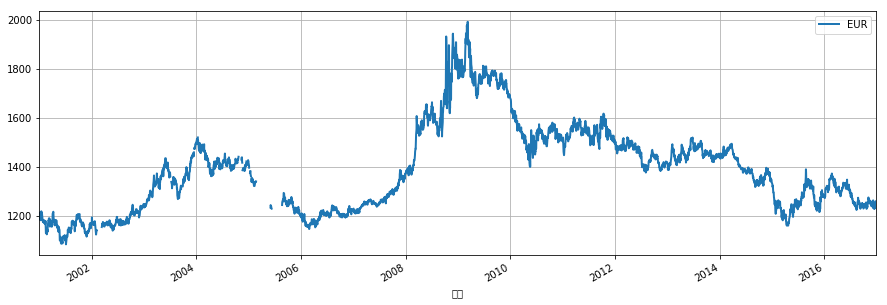

In [270]:
exchange[['날짜','EUR']].plot(x='날짜')

#### CNY

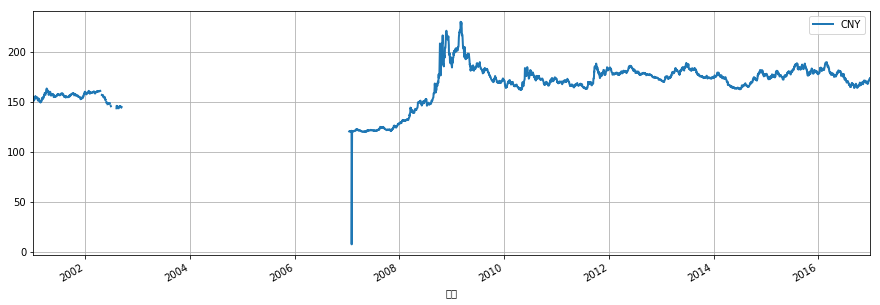

In [258]:
exchange[['날짜','CNY']].plot(x='날짜')

In [260]:
# 2006년 ~ 2008년 사이 이상치
exchange[exchange['CNY']<100].head() # 1494 2007-02-02 # 실제값 120.87

# 바꾸기
exchange.iloc[1494,3]=120.87
exchange.iloc[1494,3]

120.87

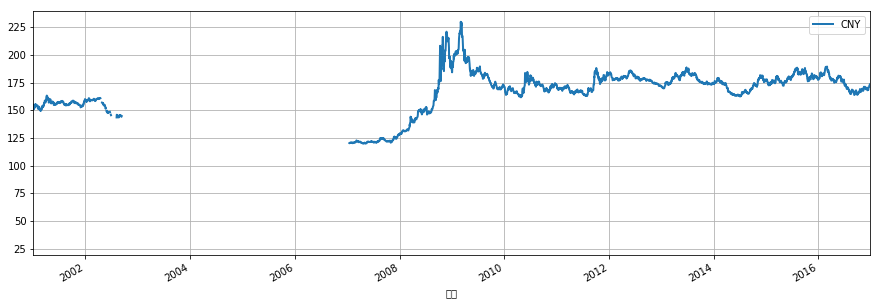

In [269]:
exchange[['날짜','CNY']].plot(x='날짜')

#### JPY

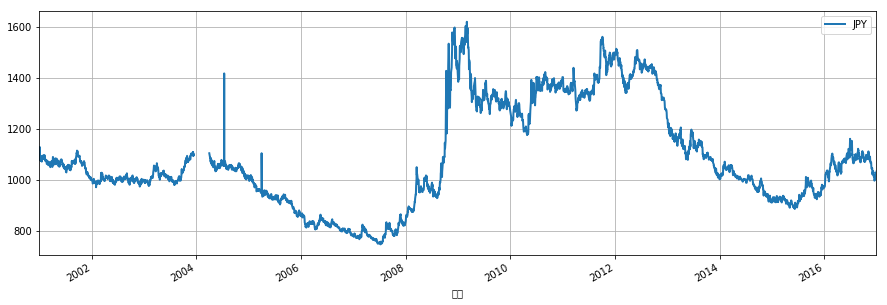

In [261]:
exchange[['날짜','JPY']].plot(x='날짜')

In [265]:
# (1) 
exchange[exchange['JPY']>1400].head() #실제값 1059.97

# 바꾸기
exchange.iloc[861,4]=1059.97
exchange.iloc[861,4]

1059.97

In [268]:
exchange[exchange['JPY']>1100] # 1035 2005-03-01 #실제값 949.56

#바꾸기
exchange.iloc[1035,4]=949.56
exchange.iloc[1035,4]

949.56

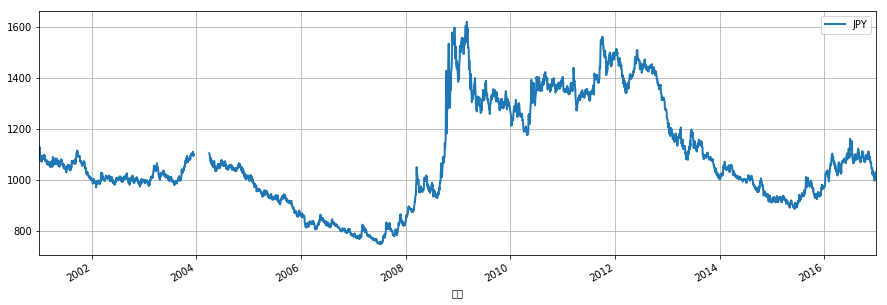

In [271]:
exchange[['날짜','JPY']].plot(x='날짜')

#### GBP

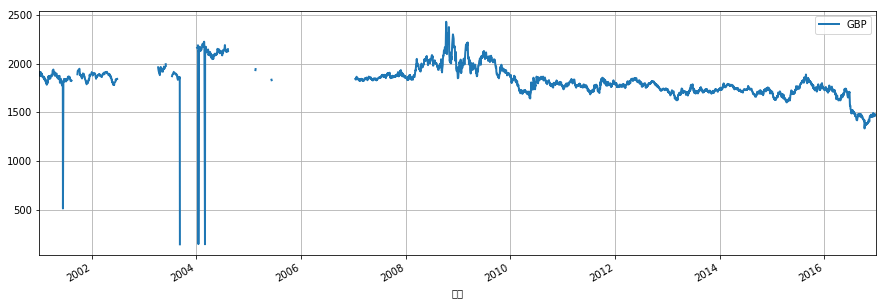

In [272]:
exchange[['날짜','GBP']].plot(x='날짜')

In [273]:
exchange[exchange['GBP']<1000]

,날짜,USD,EUR,CNY,JPY,GBP
111,2001-06-15,1291.7,1114.61,156.05,1064.09,517.33
656,2003-09-09,1172.8,1298.11,NaN,1005.62,150.37
741,2004-01-16,1187.4,1495.59,NaN,NaN,152.95
769,2004-03-02,1176.5,1465.62,NaN,NaN,151.15


In [274]:
exchange.iloc[111,5] = 1809.03
exchange.iloc[656,5] = 1857.66
exchange.iloc[741,5] = 2166.11
exchange.iloc[769,5] = 2199.64

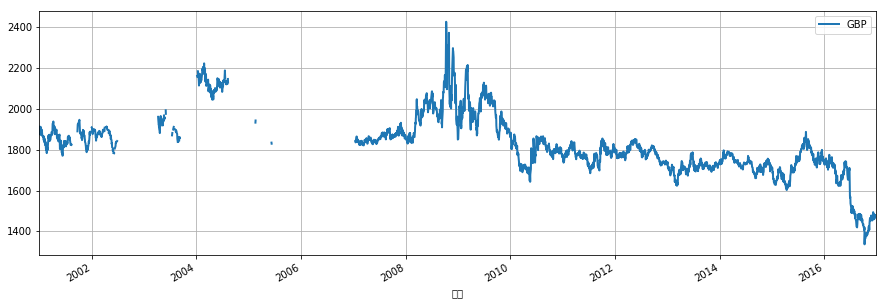

In [275]:
exchange[['날짜','GBP']].plot(x='날짜')

# 결측치 처리하기 _ (market , per , economic, exchange)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from encodings import euc_kr
import seaborn as sns

In [30]:
# 시각화를 위한 준비
import matplotlib.pylab as plb
plb.rcParams["figure.figsize"] = (50,50)
plb.rcParams['lines.linewidth'] = 2
plb.rcParams['lines.color'] = 'r'
plb.rcParams['axes.grid'] = True 

## exchange

- 결측치 = NaN
- 특정 구간이 통째로 결측치 

In [149]:
# 데이터 준비하기
exchange = pd.read_csv('./exchange_train.csv',encoding = 'utf_8')
kospi_date = pd.read_csv('./kospi_train.csv',encoding='utf_8').iloc[:,0]
kospi_date = pd.DataFrame(kospi_date)
#kospi_date
exchange = exchange.merge(kospi_date,how = 'inner',on='날짜')
exchange

,날짜,USD,EUR,CNY,JPY,GBP
0,2001-01-02,1259.7,1185.38,152.19,1099.07,1885.02
1,2001-01-03,1267.8,1205.49,153.15,1108.07,1903.35
2,2001-01-04,1285.4,1193.24,155.29,1128.53,1914.15
3,2001-01-05,1249.3,1190.90,150.92,1078.01,1876.82
4,2001-01-08,1267.8,1215.06,153.16,1088.71,1906.33
5,2001-01-09,1264.6,1196.69,152.77,1088.67,1892.98
6,2001-01-10,1257.9,1187.39,151.97,1074.67,1873.01
7,2001-01-11,1261.6,1181.93,152.42,1083.57,1876.19
8,2001-01-12,1276.6,1214.30,154.24,1082.41,1911.20
9,2001-01-15,1281.2,1218.23,154.79,1078.50,1895.09


In [7]:
# 결측치 확인하기 - 개수
exchange.isnull().sum()

날짜        0
USD       0
EUR     220
CNY    1193
JPY      72
GBP    1012
dtype: int64

- 결측치 형태가 NaN임을 알 수 있다

- USD를 제외한 모든 변수에 결측치가 존재

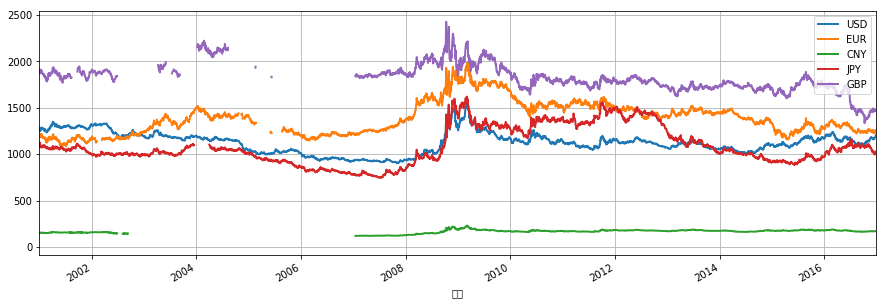

In [276]:
%matplotlib inline
import matplotlib.pylab as plb
plb.rcParams["figure.figsize"] = (15,5)
plb.rcParams['lines.linewidth'] = 2
plb.rcParams['lines.color'] = 'r'
plb.rcParams['axes.grid'] = True 

exchange.plot(x='날짜')

- 결측치의 분포가 데이터 상에 구간화되어있는 것을 확인할 수 있다.
- 단순하게 i-1번째와 i+1번째의 평균으로 결측치 처리를 할 수 없다.

결측치 처리 방법 후보
1. 버린다
2. 전체 평균으로 채운다
3. 구간의 앞뒤 평균으로 채운다

**특정 구간의 결측치를 예측하는 방향으로 간다 => local regression**

In [35]:
economic = pd.read_csv('./economic_train.csv',encoding = 'utf_8')
economic.columns

Index(['날짜', '15세이상인구[구직기간4주]', '4주평균신규실업보험청구자수NSA[미국]',
       '4주평균신규실업보험청구자수SA[미국]', 'Baker Hughes 석유시추회수 월간합계', 'CPI(원지수)[미국]',
       'CoreCPI(계절조정)[미국]', 'CoreCPI(원지수)[미국]', 'ICT설비투자지수(계절조정)',
       'ICT설비투자지수(원지수)',
       ...
       '통화량[중국](M0)', '통화량[중국](M1)', '통화량[중국](M2)', '통화량증가율[중국](M2)',
       '필라델피아연준지수[미국]', '한은 기준금리', '홍콩 소매매출증가율', '홍콩 통화량(M2)',
       '회사채유통수익률(%)(후행)', '후행종합지수(2015=100)'],
      dtype='object', length=399)

## 결측치 처리하는 모듈

1. (R) LOESS를 돌려서 전체 데이터의 예측값을 생성한다
2. 원본 데이터셋과 LOESS 예측 데이터셋을 비교하여 원본 데이터 중 결측값만 LOESS 예측값으로 대체한다.

1. 데이터를 불러온다. 불러올 데이터는 2개. 원본데이터랑 LOESS 데이터 -> 각각 original과 loess로 입력됨
2. original에서 NaN값의 위치를 찾아낸다. -> isnull()==True인 위치의 row, col을 호출받기
3. 찾아낸 위치와 똑같은 위치를 LOESS와 연결시킨다.
4. 해당 위치의 loess값을 가져와 original에 채운다

In [59]:
def fill_na2loess(original,loess):
    ### original의 사본 만들기
    new_original = original
    
    ### original에서 NaN 위치 찾아내기
    na_where = np.where(new_original.isnull()==True) #na의 위치를 np.array로 받기
    na_where_row = na_where[0] # na가 있는 row벡터
    na_where_col = na_where[1] # na가 있는 col벡터
    n = len(na_where_row)
    
    ### i행 j열에 있는 na값을 loess 예측값으로 대체하기
    for i in range(n):
        r = na_where_row[i]
        c = na_where_col[i]
        new_original.iloc[r,c] = loess.iloc[r,c]
    
    ### 새로 채운 데이터셋 반환하기
    return new_original

In [60]:
df3 = fill_na2loess(df1,df2)
df3

,A,B,C,D
0,100.0,2.0,200.0,0
1,3.0,4.0,300.0,1
2,400.0,500.0,600.0,5
3,700.0,3.0,800.0,4


In [72]:
index = pd.Series(range(exchange.shape[0]))
exchange_index = pd.concat([index,exchange],axis = 1 )
exchange_index

,0,날짜,USD,EUR,CNY,JPY,GBP
0,0,2001-01-02,1259.7,1185.38,152.19,1099.07,1885.02
1,1,2001-01-03,1267.8,1205.49,153.15,1108.07,1903.35
2,2,2001-01-04,1285.4,1193.24,155.29,1128.53,1914.15
3,3,2001-01-05,1249.3,1190.90,150.92,1078.01,1876.82
4,4,2001-01-08,1267.8,1215.06,153.16,1088.71,1906.33
5,5,2001-01-09,1264.6,1196.69,152.77,1088.67,1892.98
6,6,2001-01-10,1257.9,1187.39,151.97,1074.67,1873.01
7,7,2001-01-11,1261.6,1181.93,152.42,1083.57,1876.19
8,8,2001-01-12,1276.6,1214.30,154.24,1082.41,1911.20
9,9,2001-01-13,1281.2,NaN,NaN,1078.50,NaN


# 시계열 예측 할 수 있을까? fear.ML

In [150]:
exchange_ml = exchange
exchange_ml["날짜"] = pd.to_datetime(exchange_ml["날짜"], format="%Y/%m/%d")
exchange_ml.dtypes

날짜     datetime64[ns]
USD           float64
EUR           float64
CNY           float64
JPY           float64
GBP           float64
dtype: object

## ARIMA_JPY

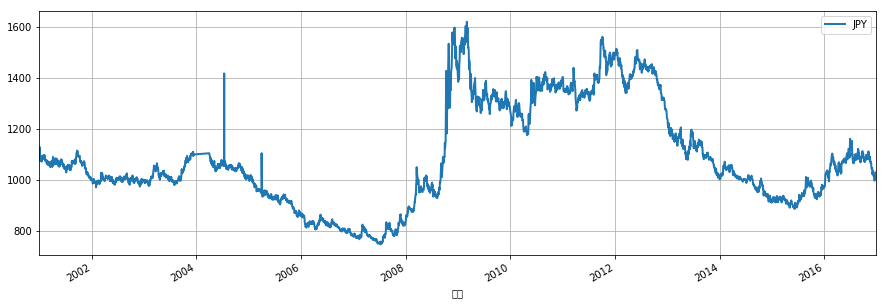

In [157]:
## jpy 데이터 준비
data_jpy = exchange_ml[exchange_ml['JPY'].isnull()==False]
data_jpy = data_jpy[['날짜','JPY']]
data_jpy
data_jpy.plot(x='날짜')

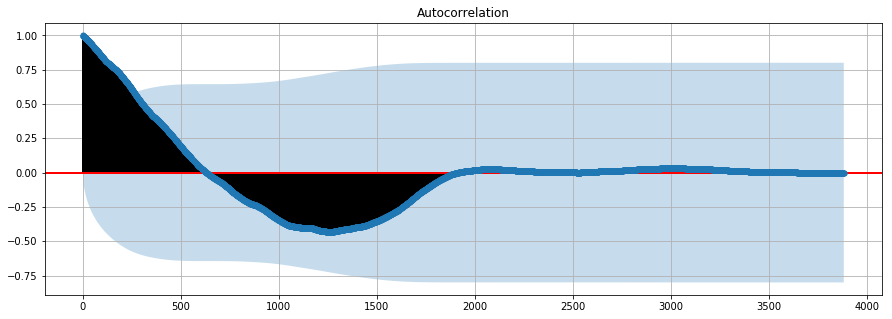

In [152]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_jpy.iloc[:,1])
plt.show()

- tag 600정도에서 자기상관이 양에서 음으로 변한다 -> 따라서 p=0
- 1차 차분 후에 다시 확인한다
[참고](https://byeongkijeong.github.io/ARIMA-with-Python/)

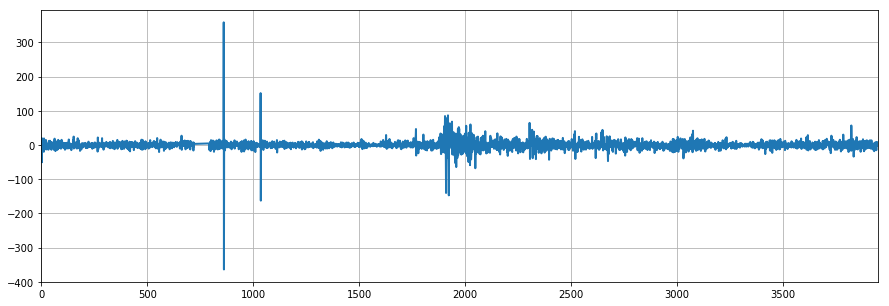

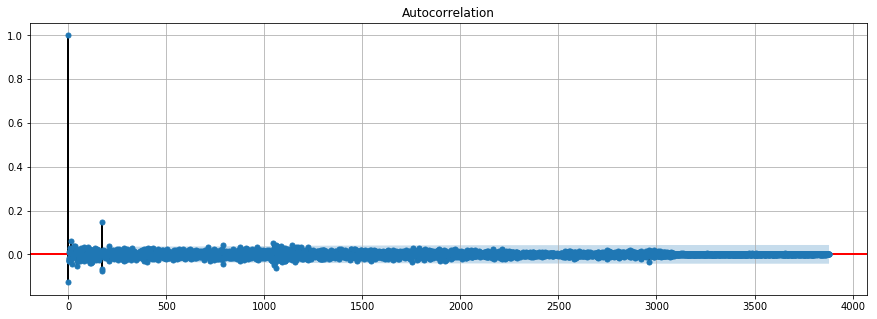

In [153]:
diff_1=data_jpy.iloc[:,1].diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
#plot_pacf(diff_1)
plt.show()

In [154]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_jpy.iloc[:,1], order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.JPY   No. Observations:                 3881
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -15782.289
Method:                       css-mle   S.D. of innovations             14.120
Date:                Sat, 02 Nov 2019   AIC                          31570.578
Time:                        01:05:58   BIC                          31589.369
Sample:                             1   HQIC                         31577.249
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0180      0.195     -0.092      0.927      -0.400       0.364
ma.L1.D.JPY    -0.1396      0.017     -8.414      0.000      -0.172      -0.107
                                    Roots       

C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [155]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_jpy.iloc[:,1], order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.JPY   No. Observations:                 3881
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -15782.293
Method:                       css-mle   S.D. of innovations             14.120
Date:                Sat, 02 Nov 2019   AIC                          31568.586
Time:                        01:06:07   BIC                          31581.114
Sample:                             1   HQIC                         31573.034
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D.JPY    -0.1396      0.017     -8.414      0.000      -0.172      -0.107
                                    Roots                                    
                  Real          Imaginary         

C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


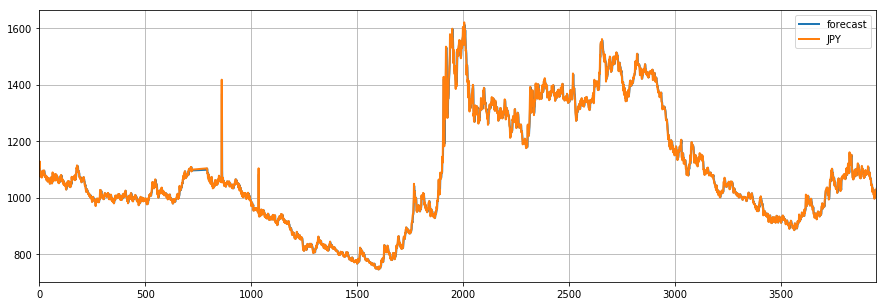

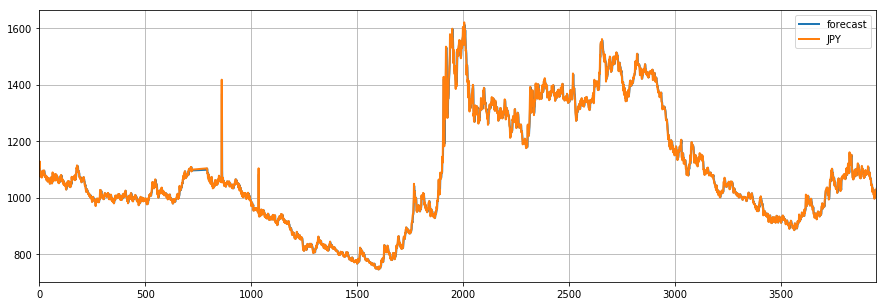

In [156]:
model_fit.plot_predict()

In [176]:
fore = model_fit.forecast(steps=1)
fore=float(fore[0])
fore = round(fore,2)
fore

1030.86

### ARIMA로 결측치 예측하는 모듈 만들기

> nan을 포함하지 않은 전체 모형의 추이가 (0,1,1) parameter에 적절하다고 판단하여 파라미터를 다음과 같이 설정. 자동화 모듈을 만든다

1. 데이터를 받는다.(날짜와 quantity변수가 포함된 n*2 dataframe형식)
2. 데이터의 Nan를 찾고 NaN가 나타날 때마다 데이터를 자른다
3. 잘라낸 데이터(nan이 없는 데이터)로 ARIMA 모델을 학습시킨 후 예측값을 출력한다.
4. 예측값을 빈 리스트에 저장한다
5. 더이상 nan이 나타나지 않고 data의 length까지 도달할 경우 반복을 멈춘다
6. 결과 리스트를 NaN 위치에 대체하고 new data를 저장한다
7. new data를 반환한다

In [204]:
exchange[['날짜','JPY']]

nan

In [211]:
def fill_na_ARIMA(x):
    # 1. 데이터 받기 - col하나만 가지고 있는 데이터 ex)exchange['JPY'] - pd.Series형식
    # 2. NaN 찾아내기
    i = 0
    while x.iloc[:,1].isnull().sum() > 0:
        if x.iloc[:,1].isnull()[i]==True:
            # 3. nan발견하면 데이터 자르기
            train = x.iloc[:,1]
            train = train[:i]
            # 
            model = ARIMA(train, order=(0,1,1))
            model_fit = model.fit(trend='nc',full_output=True, disp=1)
            fore = model_fit.forecast(steps=1)
            pred = float(fore[0])
            pred = round(pred,2)
            x.iloc[i,1] = pred
            i = 0
            continue
        else:
            i += 1    
    return x

In [277]:
new_EUR = fill_na_ARIMA(exchange[['날짜','EUR']])

C:\Users\genie\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [278]:
new_EUR.isnull().sum()

날짜     0
EUR    0
dtype: int64

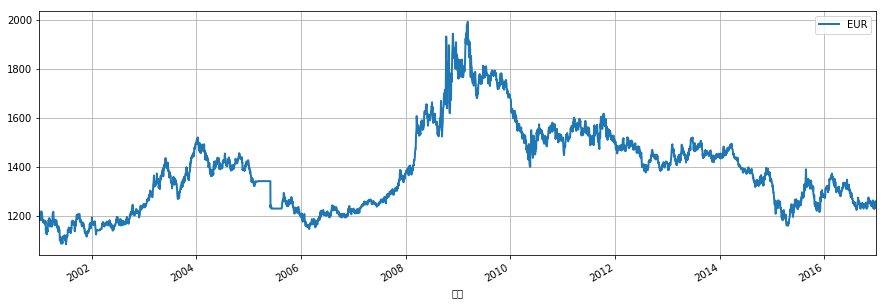

In [279]:
new_EUR.plot(x='날짜')

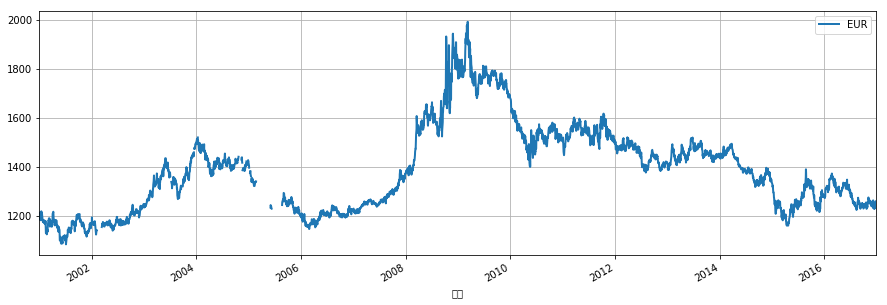

In [280]:
# 원본 데이터
exchange[['날짜','EUR']].plot(x = '날짜')